Самостоятельно обучить классификатор текстов на примере 20newsgroups  
На примере 20 newsgroups попробовать разные параметры для сверток для классификации текстов  

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

возьмем только 4 категории из 20 доступных в наборе данных

In [7]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [8]:
train = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)

In [9]:
train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [10]:
print(len(train.data))
len(train.filenames)

2257


2257

In [11]:
print(train.target_names[train.target[6]])
train.target[:10]

soc.religion.christian


array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [12]:
for i in train.target[:10]:
    print(train.target_names[i])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


Выведем первые строки первого загруженного файла

In [13]:
columns=['data', 'target']

In [14]:
df = pd.DataFrame(columns= columns)

In [15]:
# a = {'data': "\n".join(train.data[0].split("\n")),
#     'target': train.target[1]}
# df = df.append(a, ignore_index=True)
# df.iloc[0,0]

In [16]:
"\n".join(train.data[2].split("\n"))

"From: djohnson@cs.ucsd.edu (Darin Johnson)\nSubject: Re: harrassed at work, could use some prayers\nOrganization: =CSE Dept., U.C. San Diego\nLines: 63\n\n(Well, I'll email also, but this may apply to other people, so\nI'll post also.)\n\n>I've been working at this company for eight years in various\n>engineering jobs.  I'm female.  Yesterday I counted and realized that\n>on seven different occasions I've been sexually harrassed at this\n>company.\n\n>I dreaded coming back to work today.  What if my boss comes in to ask\n>me some kind of question...\n\nYour boss should be the person bring these problems to.  If he/she\ndoes not seem to take any action, keep going up higher and higher.\nSexual harrassment does not need to be tolerated, and it can be an\nenormous emotional support to discuss this with someone and know that\nthey are trying to do something about it.  If you feel you can not\ndiscuss this with your boss, perhaps your company has a personnel\ndepartment that can work for y

In [17]:
for i in range(len(train.data)):
    a = {'data': "\n".join(train.data[i].split("\n")),
    'target': train.target[i]}
    df = df.append(a, ignore_index=True)

In [18]:
df.head()

,data,target
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,3
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3


In [19]:
df = df.astype({"target": np.int64})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2257 non-null   object
 1   target  2257 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.4+ KB


In [21]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [23]:
sw = set(get_stop_words("en"))
exclude = set(punctuation)
morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in exclude)
    txt = txt.lower()
    txt = re.sub("не\s*", "не", txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    return " ".join(txt)

df['data'] = df.data.apply(preprocess_text)
# df_val['text'] = df_val['text'].apply(preprocess_text)
# df_test['text'] = df_test['text'].apply(preprocess_text)

In [24]:
dfn = df.head(5)

In [25]:
num = []

In [26]:
for i in df['data']:
#     print(i, '\n')
    num.append(len(i))

print(max(num))

43637


In [27]:
tr = int(len(train.data)* 0.6)
tv = int(len(train.data)* 0.2)
print(tr, tv)

1354 451


In [28]:
df['target'].unique()

array([1, 3, 2, 0], dtype=int64)

In [29]:
df_train = df.loc[:tr]
df_test = df.loc[tr:tv+tr]
df_val = df.loc[tv+tr:]

print(df_train.shape)
print(df_test.shape)
print(df_val.shape)


(1355, 2)
(452, 2)
(452, 2)


In [30]:
train_corpus = " ".join(df_train["data"])
train_corpus = train_corpus.lower()

In [31]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agvor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [33]:
max_words = 2000
max_len = 1000
num_classes = 4



In [34]:
from nltk.probability import FreqDist
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]

In [35]:
tokens_filtered_top[10:]

['dont',
 'article',
 'know',
 'think',
 'just',
 'university',
 'like',
 'also',
 'time',
 'good',
 'may',
 'im',
 'say',
 'many',
 'us',
 'get',
 'even',
 'jesus',
 'see',
 'believe',
 'use',
 'image',
 'well',
 'new',
 'nntppostinghost',
 'now',
 'much',
 'way',
 'science',
 'question',
 'must',
 'something',
 'find',
 'world',
 'make',
 'said',
 'need',
 'first',
 'things',
 'system',
 'read',
 'anyone',
 'want',
 'bible',
 'point',
 'problem',
 'two',
 'really',
 'life',
 'since',
 'christian',
 'true',
 'right',
 'help',
 'without',
 'used',
 'computer',
 'work',
 'years',
 'church',
 '2',
 'might',
 'faith',
 'please',
 'however',
 'ive',
 'still',
 'thing',
 'email',
 'take',
 'etc',
 '1',
 'information',
 'christians',
 'evidence',
 'go',
 'research',
 'different',
 'cant',
 'case',
 'fact',
 'mean',
 'another',
 'graphics',
 'atheists',
 'rather',
 'doesnt',
 'come',
 'never',
 'anything',
 'seems',
 'gods',
 'law',
 'available',
 'file',
 'made',
 'truth',
 'replyto',
 'sure

In [36]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [37]:
import numpy as np
def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0]*(maxlen-len(result))
    return padding + result[-maxlen:]

In [38]:
tokens = word_tokenize(df_train["data"][0].lower())

In [39]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [40]:
tokens_filtered[:5]

['sd345cityacuk', 'michael', 'collier', 'subject', 'converting']

In [41]:
result = []

In [42]:
x_train = np.asarray([text_to_sequence(text, max_len) for text in df_train["data"]], dtype=np.int32)
x_test = np.asarray([text_to_sequence(text, max_len) for text in df_test["data"]], dtype=np.int32)
x_val = np.asarray([text_to_sequence(text, max_len) for text in df_val["data"]], dtype=np.int32)

In [43]:
x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [44]:
import random
import torch
import torch.nn as nn

seed = 0

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [45]:
from torch.utils.data import DataLoader, Dataset

class DataWrapper(Dataset):
    def __init__(self, data, target=None, transform=None):
        self.data = torch.from_numpy(data).long()
        if target is not None:
            self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index] if self.target is not None else None
        
        if self.transform:
            x = self.transform(x)
            
        return x, y
    
    def __len__(self):
        return len(self.data)

In [46]:
class Net(nn.Module):
    def __init__(self, vocab_size=20, embedding_dim = 128, out_channel = 128, num_classes = 1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(out_channel, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x)
        #                       B  F  L         
        output = output.permute(0, 2, 1)
        output = self.conv(output)
        output = self.relu(output)
        output = torch.max(output, axis=2).values
#         print(output.shape)
        output = self.linear(output)
        print(output.shape)
        
        return output

In [47]:
# result_loss = pd.DataFrame(columns= ['epochs', 'batch', 'lr','optimizer' , 'criterion', 'loss'])
# result_loss

In [61]:
# Training
epochs = 5
batch_size = 128
print_batch_n = 100
learning_rate = 0.01
criterion = nn.BCEWithLogitsLoss()
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#opt = str(optimizer).split()[0]

In [62]:
model = Net(vocab_size=max_words)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
opt = str(optimizer).split()[0]

print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

model.train()
#model = model.cuda()

# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = optimizer
criterion = criterion



    
train_dataset = DataWrapper(x_train, df_train['target'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,drop_last=True)

val_dataset = DataWrapper(x_val, df_val['target'].values)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True,drop_last=True)

loss_history = []
result_loss = []

for epoch in range(1, epochs + 1):
    print(f"Train epoch {epoch}/{epochs}")
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        # data = data.cuda()
        # target = target.cuda()
        
        # compute output
        output = model(data)
        
        # compute gradient and do SGD step
#         print(target.float().view(-1, 1))
        loss = criterion(output, target.float().view(-1, 1))
        loss.backward()
        
        optimizer.step()
        
        if i%print_batch_n == 0:
            loss = loss.float().item()
            print("Step {}: loss={}".format(i, loss))
            loss_history.append(loss)
            #esult_loss = result_loss.append({'epochs': epochs, 'batch': batch_size,'optimizer': opt,'criterion': criterion}, ignore_index= True)

Net(
  (embedding): Embedding(2000, 128)
  (conv): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (relu): ReLU()
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Parameters: 305409
Train epoch 1/5
torch.Size([128, 1])
Step 0: loss=1.196550965309143
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
Train epoch 2/5
torch.Size([128, 1])
Step 0: loss=-83.69770812988281
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
Train epoch 3/5
torch.Size([128, 1])
Step 0: loss=-575.9852294921875
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
Train epoch 4/5
torch.Size(

Populating the interactive namespace from numpy and matplotlib


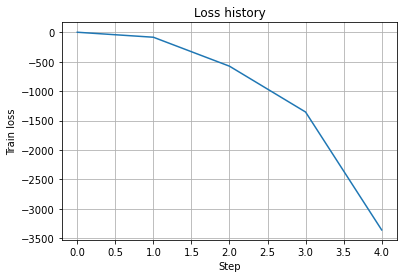

In [63]:
import matplotlib.pyplot as plt
%pylab inline
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_history);

In [139]:
result_loss.shape

(80, 6)

In [110]:
# result_loss.to_csv('loss.csv')

In [135]:
result_loss = pd.read_csv('loss.csv', index_col=0)

In [131]:
print(result_loss.head(60))

    epochs  batch     lr optimizer            criterion      loss
0       20    128  0.010      Adam  BCEWithLogitsLoss() -0.248587
1       20    128  0.010      Adam  BCEWithLogitsLoss() -0.602081
2       20    128  0.010      Adam  BCEWithLogitsLoss() -0.459542
3       20    128  0.010      Adam  BCEWithLogitsLoss() -0.499464
4       20    128  0.010      Adam  BCEWithLogitsLoss() -0.476288
5       20    128  0.010      Adam  BCEWithLogitsLoss() -0.394077
6       20    128  0.010      Adam  BCEWithLogitsLoss() -0.833189
7       20    128  0.010      Adam  BCEWithLogitsLoss() -0.407315
8       20    128  0.010      Adam  BCEWithLogitsLoss() -0.643042
9       20    128  0.010      Adam  BCEWithLogitsLoss() -0.413099
10      20    128  0.010      Adam  BCEWithLogitsLoss() -0.713040
11      20    128  0.010      Adam  BCEWithLogitsLoss() -0.729515
12      20    128  0.010      Adam  BCEWithLogitsLoss() -0.455549
13      20    128  0.010      Adam  BCEWithLogitsLoss() -0.553259
14      20

In [123]:
loss_1 = result_loss.head(20)
loss_2 = result_loss.iloc[20:40]
loss_2 = loss_2.reset_index(drop=True)
loss_3 = result_loss.iloc[40:50]
loss_3 = loss_3.reset_index(drop=True)
loss_4 = result_loss.iloc[50:60]
loss_4 = loss_4.reset_index(drop=True)
loss_5 = result_loss.iloc[60:]
loss_5 = loss_5.reset_index(drop=True)
loss_4.head(20)

,epochs,batch,lr,optimizer,criterion,loss
0,10,512,0.001,SGD,BCEWithLogitsLoss(),2.058223
1,10,512,0.001,SGD,BCEWithLogitsLoss(),2.076523
2,10,512,0.001,SGD,BCEWithLogitsLoss(),2.116362
3,10,512,0.001,SGD,BCEWithLogitsLoss(),2.077231
4,10,512,0.001,SGD,BCEWithLogitsLoss(),2.103926
5,10,512,0.001,SGD,BCEWithLogitsLoss(),2.034565
6,10,512,0.001,SGD,BCEWithLogitsLoss(),2.014136
7,10,512,0.001,SGD,BCEWithLogitsLoss(),2.107410
8,10,512,0.001,SGD,BCEWithLogitsLoss(),2.092659
9,10,512,0.001,SGD,BCEWithLogitsLoss(),2.085810


Populating the interactive namespace from numpy and matplotlib


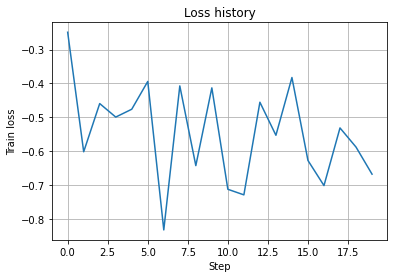

In [124]:
import matplotlib.pyplot as plt
%pylab inline
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_1['loss']);

Populating the interactive namespace from numpy and matplotlib


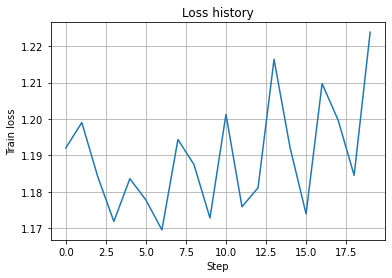

In [125]:
import matplotlib.pyplot as plt
%pylab inline
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_2['loss']);

Populating the interactive namespace from numpy and matplotlib


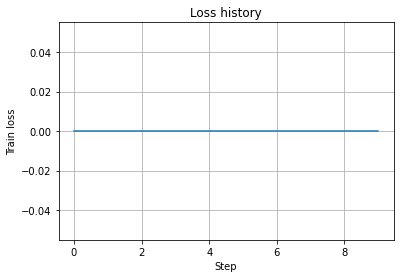

In [126]:
import matplotlib.pyplot as plt
%pylab inline
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_3['loss']);

Populating the interactive namespace from numpy and matplotlib


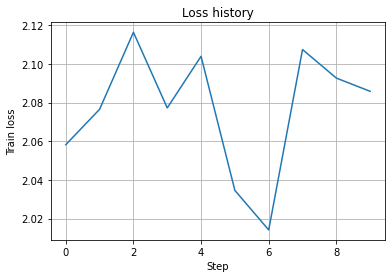

In [127]:
import matplotlib.pyplot as plt
%pylab inline
plt.title('Loss history')
plt.grid(True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.plot(loss_4['loss']);